#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
df = pd.read_csv("../csv/dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Handling missing values:
df.isnull().sum()

# There is no single missing value in our dataset.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# We need to scale our feature we will use StandardScaler :
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=scaler.get_feature_names_out())

In [15]:
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [111]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [115]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[32  9]
 [ 8 42]]
0.8131868131868132


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [116]:
rfc

RandomForestClassifier(max_depth=10)

In [129]:
pd.DataFrame(rfc.feature_importances_)[0].sort_values(ascending=False)[:2].index-2

Int64Index([9, 10], dtype='int64')

<Axes: title={'center': 'Top 5 Most Important Features'}, xlabel='Features', ylabel='Score'>

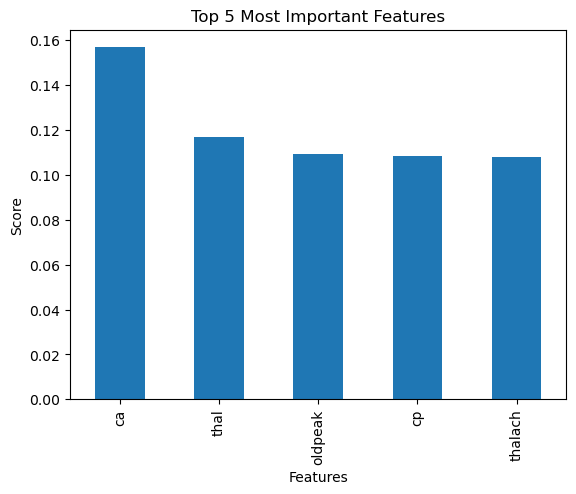

In [117]:
pd.DataFrame(rfc.feature_importances_,index=rfc.feature_names_in_)[0].sort_values(ascending=False)[:5].plot.bar(title="Top 5 Most Important Features",xlabel="Features",ylabel="Score")

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [118]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[100,200,300,400],
    "max_depth":[5,10,15,20],
    "min_samples_split":[2,6,10,14],
    "min_samples_leaf":[1,2,3,4]
}

classifier = RandomForestClassifier()
cv_classifier = GridSearchCV(classifier,param_grid=params,cv=5)

cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 6, 10, 14],
                         'n_estimators': [100, 200, 300, 400]})

In [119]:
y_cv_pred = cv_classifier.predict(X_test)

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [120]:
cv_classifier.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [121]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_cv_pred))
print(confusion_matrix(y_test,y_cv_pred))
print(accuracy_score(y_test,y_cv_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

[[32  9]
 [ 6 44]]
0.8351648351648352


In [122]:
print("Defaul Model :",accuracy_score(y_test,y_pred))
print("Hyperparameter Tuned Model :",accuracy_score(y_test,y_cv_pred))
# In default model we got 81% of accuracy while in hyperparameter tuned model we got 83% of accuracy.

Defaul Model : 0.8131868131868132
Hyperparameter Tuned Model : 0.8351648351648352


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [ ]:
clf = RandomForestClassifier(max_depth= 15,min_samples_leaf=1,min_samples_split=6)
clf.fit(X,y)

# Finding the most important features
feature_importances = clf.feature_importances_
most_important_features = np.argsort(feature_importances)[-2:]  # Get indices of top 2 features

# Selecting the top 2 features
X_top_features = X_ar[:, most_important_features]
# X_top_features = X.iloc[:,:]

# Creating a meshgrid to visualize decision boundaries
x_min, x_max = X_top_features[:, 0].min() - 1, X_top_features[:, 0].max() + 1
y_min, y_max = X_top_features[:, 1].min() - 1, X_top_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predicting for each point in the meshgrid to get decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_top_features[:, 0], X_top_features[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Cholesterol Levels)')
plt.title('Random Forest Classifier Decision Boundaries')

plt.show()